# 3. Feature extraction

### Features to consider 
In order to consider which attributes to extract I considered as reference a similar dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('dataset/dataset_small.csv')

for col in df.columns:
    print(col)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_slash_url
qty_questionmark_url
qty_equal_url
qty_at_url
qty_and_url
qty_exclamation_url
qty_space_url
qty_tilde_url
qty_comma_url
qty_plus_url
qty_asterisk_url
qty_hashtag_url
qty_dollar_url
qty_percent_url
qty_tld_url
length_url
qty_dot_domain
qty_hyphen_domain
qty_underline_domain
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_at_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain
qty_vowels_domain
domain_length
domain_in_ip
server_client_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
qty_slash_directory
qty_questionmark_directory
qty_equal_directory
qty_at_directory
qty_and_directory
qty_exclamation_directory
qty_space_directory
qty_tilde_directory
qty_comma_directory
qty_plus_directory
qty_asterisk_directory
qty_hashtag_directory
qty_dollar_directory
qty_percent_

Taking into account the feasibility of extracting such features, I'm selecting the following subset: qty_dot_url, qty_hyphen_url, qty_underline_url, qty_slash_url, qty_questionmark_url, qty_equal_url, qty_at_url, qty_and_url, qty_exclamation_url, qty_tilde_url, qty_comma_url, qty_plus_url, qty_asterisk_url, qty_hashtag_url, qty_dollar_url, qty_percent_url, length_url, qty_tld_url, qty_dot_domain, qty_hyphen_domain, qty_underline_domain, qty_slash_domain
qty_questionmark_domain, qty_equal_domain, qty_at_domain, qty_and_domain, qty_exclamation_domain, qty_tilde_domain, qty_comma_domain, qty_plus_domain, qty_asterisk_domain, qty_hashtag_domain, qty_dollar_domain, qty_percent_domain, qty_vowels_domain, domain_length, qty_dot_directory, qty_hyphen_directory, qty_underline_directory, qty_slash_directory, qty_questionmark_directory, qty_equal_directory, qty_at_directory, qty_and_directory, qty_exclamation_directory, qty_tilde_directory, qty_comma_directory, qty_plus_directory, qty_asterisk_directory, qty_hashtag_directory, qty_dollar_directory, qty_percent_directory, directory_length, qty_dot_file, qty_hyphen_file, qty_underline_file, qty_slash_file, qty_questionmark_file, qty_equal_file, qty_at_file, qty_and_file, qty_exclamation_file, qty_tilde_file, qty_comma_file, qty_plus_file, qty_asterisk_file, qty_hashtag_file, qty_dollar_file, qty_percent_file, file_length, qty_dot_params, qty_hyphen_params, qty_underline_params, qty_slash_params, qty_questionmark_params, qty_equal_params, qty_at_params, qty_and_params, qty_exclamation_params, qty_tilde_params, qty_comma_params, qty_plus_params, qty_asterisk_params, qty_hashtag_params, qty_dollar_params, qty_percent_params, params_length, email_in_url.

### URL features

In [ ]:
import re
import pandas as pd

df = pd.read_csv('dataset/train_dataset.csv')

def extract_url_features(url):
    features = {}

    features['qty_dot_url'] = url.count('.')
    features['qty_hyphen_url'] = url.count('-')
    features['qty_underline_url'] = url.count('_')
    features['qty_slash_url'] = url.count('/')
    features['qty_questionmark_url'] = url.count('?')
    features['qty_equal_url'] = url.count('=')
    features['qty_at_url'] = url.count('@')
    features['qty_and_url'] = url.count('&')
    features['qty_exclamation_url'] = url.count('!')
    features['qty_tilde_url'] = url.count('~')
    features['qty_comma_url'] = url.count(',')
    features['qty_plus_url'] = url.count('+')
    features['qty_asterisk_url'] = url.count('*')
    features['qty_hashtag_url'] = url.count('#')
    features['qty_dollar_url'] = url.count('$')
    features['qty_percent_url'] = url.count('%')
    
    # top-level domain
    tld_pattern = r'\.[a-z]{2,}$'  # examples: .com, .org, etc.
    features['qty_tld_url'] = len(re.findall(tld_pattern, url))
    
    features['length_url'] = len(url)
    
    return features

url_features = []

# loops through URLs in dataset
for index, row in df.iterrows():
    url = row['URL']
    features = extract_url_features(url)
    url_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs") # logs

features_df = pd.DataFrame(url_features)

X_with_features = pd.concat([df, features_df], axis=1)

X_with_features.to_csv('dataset/url_feats.csv', index=False)
print("Feature extraction complete. See: 'url_feats.csv'")


Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Feature extraction complete. See: 'url_feats.csv'


### Domain level features

In [ ]:
import socket
import re
import pandas as pd

df = pd.read_csv('dataset/url_feats.csv')

def extract_domain(url):
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url

    domain = re.findall(r'://(.*?)(/|$)', url)
    if domain:
        return domain[0][0]
    else:
        if url.startswith('www.'):
            return url.split('/')[0].replace('www.', '')
        return url.split('/')[0]

def extract_domain_features(domain):
    features = {}
    
    features['qty_dot_domain'] = domain.count('.')
    features['qty_hyphen_domain'] = domain.count('-')
    features['qty_underline_domain'] = domain.count('_')
    features['qty_slash_domain'] = domain.count('/')
    features['qty_questionmark_domain'] = domain.count('?')
    
    features['qty_equal_domain'] = domain.count('=')
    features['qty_at_domain'] = domain.count('@')
    features['qty_and_domain'] = domain.count('&')
    features['qty_exclamation_domain'] = domain.count('!')
    features['qty_tilde_domain'] = domain.count('~')
    
    features['qty_comma_domain'] = domain.count(',')
    features['qty_plus_domain'] = domain.count('+')
    features['qty_asterisk_domain'] = domain.count('*')
    features['qty_hashtag_domain'] = domain.count('#')
    features['qty_dollar_domain'] = domain.count('$')
    
    features['qty_percent_domain'] = domain.count('%')
    
    features['qty_vowels_domain'] = sum([1 for char in domain if char.lower() in 'aeiou'])
    
    features['domain_length'] = len(domain)
    
    # check if domain is an IP address
    try:
        socket.inet_aton(domain) 
        features['domain_in_ip'] = 1
    except socket.error:
        features['domain_in_ip'] = 0
    
    server_keywords = ['server', 'cloud', 'cdn', 'aws', 'hosting']
    features['server_client_domain'] = int(any(keyword in domain for keyword in server_keywords))

    return features

domain_features = []

for index, row in df.iterrows():
    url = row['URL']
    domain = extract_domain(url)
    features = extract_domain_features(domain)
    domain_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(domain_features)

df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/domain_feats.csv', index=False)
print("Domain feature extraction complete:'domain_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Domain feature extraction complete:'domain_feats.csv'


### Directory path features

If a part (ex. 'directory') is missing, then the value for 'directory_present' is assigned 0 and all its related features are assigned -1.

In [ ]:
import pandas as pd
import re

df = pd.read_csv('dataset/domain_feats.csv')

def extract_directory(url):
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url
    match = re.search(r'://[^/]+(/.*?)(\?|$)', url)
    if match:
        return match.group(1)  # get directory path
    else:
        return None

def extract_directory_features(directory):
    features = {}
    
    if directory is None:
        features['has_dir'] = 0  # no directory part
        # assign -1 to other features when there's no directory part
        features['qty_dot_directory'] = -1
        features['qty_hyphen_directory'] = -1
        features['qty_underline_directory'] = -1
        features['qty_slash_directory'] = -1
        features['qty_questionmark_directory'] = -1
        features['qty_equal_directory'] = -1
        features['qty_at_directory'] = -1
        features['qty_and_directory'] = -1
        features['qty_exclamation_directory'] = -1
        features['qty_tilde_directory'] = -1
        features['qty_comma_directory'] = -1
        features['qty_plus_directory'] = -1
        features['qty_asterisk_directory'] = -1
        features['qty_hashtag_directory'] = -1
        features['qty_dollar_directory'] = -1
        features['qty_percent_directory'] = -1
        features['directory_length'] = 0
    else:
        features['has_dir'] = 1  # Directory part is present
        # count different characters in the directory
        features['qty_dot_directory'] = directory.count('.')
        features['qty_hyphen_directory'] = directory.count('-')
        features['qty_underline_directory'] = directory.count('_')
        features['qty_slash_directory'] = directory.count('/')
        features['qty_questionmark_directory'] = directory.count('?')
        features['qty_equal_directory'] = directory.count('=')
        features['qty_at_directory'] = directory.count('@')
        features['qty_and_directory'] = directory.count('&')
        features['qty_exclamation_directory'] = directory.count('!')
        features['qty_tilde_directory'] = directory.count('~')
        features['qty_comma_directory'] = directory.count(',')
        features['qty_plus_directory'] = directory.count('+')
        features['qty_asterisk_directory'] = directory.count('*')
        features['qty_hashtag_directory'] = directory.count('#')
        features['qty_dollar_directory'] = directory.count('$')
        features['qty_percent_directory'] = directory.count('%')
        
        features['directory_length'] = len(directory)
    
    return features

directory_features = []

for index, row in df.iterrows():
    url = row['URL']
    directory = extract_directory(url)
    features = extract_directory_features(directory)
    directory_features.append(features)

    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(directory_features)

df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/directory_feats.csv', index=False)
print("Directory feature extraction complete: 'directory_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Directory feature extraction complete: 'directory_feats.csv'


In [ ]:
import pandas as pd
import re

df = pd.read_csv('dataset/directory_feats.csv')

def extract_file(url):

    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url  

    match = re.search(r'\/([^\/\?]*)(\?|$)', url)
    if match:
        return match.group(1) if match.group(1) else None
    return None

def extract_file_features(file):
    features = {}
    
    if file is None or file == '':
        # assign -1 to other features when there's no file part
        features['qty_dot_file'] = -1
        features['qty_hyphen_file'] = -1
        features['qty_underline_file'] = -1
        features['qty_slash_file'] = -1
        features['qty_questionmark_file'] = -1
        features['qty_equal_file'] = -1
        features['qty_at_file'] = -1
        features['qty_and_file'] = -1
        features['qty_exclamation_file'] = -1
        features['qty_tilde_file'] = -1
        features['qty_comma_file'] = -1
        features['qty_plus_file'] = -1
        features['qty_asterisk_file'] = -1
        features['qty_hashtag_file'] = -1
        features['qty_dollar_file'] = -1
        features['qty_percent_file'] = -1
        features['file_length'] = 0 
        features['has_file'] = 0  
    else:
        features['qty_dot_file'] = file.count('.')
        features['qty_hyphen_file'] = file.count('-')
        features['qty_underline_file'] = file.count('_')
        features['qty_slash_file'] = file.count('/')
        features['qty_questionmark_file'] = file.count('?')
        features['qty_equal_file'] = file.count('=')
        features['qty_at_file'] = file.count('@')
        features['qty_and_file'] = file.count('&')
        features['qty_exclamation_file'] = file.count('!')
        features['qty_tilde_file'] = file.count('~')
        features['qty_comma_file'] = file.count(',')
        features['qty_plus_file'] = file.count('+')
        features['qty_asterisk_file'] = file.count('*')
        features['qty_hashtag_file'] = file.count('#')
        features['qty_dollar_file'] = file.count('$')
        features['qty_percent_file'] = file.count('%')
        
        features['file_length'] = len(file)
        features['has_file'] = 1

    return features

file_features = []

for index, row in df.iterrows():
    url = row['URL']
    file = extract_file(url)
    features = extract_file_features(file)
    file_features.append(features)

    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(file_features)
df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/file_feats.csv', index=False)
print("File feature extraction complete: 'file_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
File feature extraction complete: 'file_feats.csv'


### Parameter domain features

In [ ]:
import pandas as pd
import re

df = pd.read_csv('dataset/file_feats.csv')

def extract_params(url):

    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url

    match = re.search(r'\?(.*)', url)
    if match:
        return match.group(1) 
    return None

# check presence of TLD
def tld_present(params):
    tlds = ['.com', '.net', '.org', '.edu', '.gov', '.co', '.us', '.info']
    if params:
        for tld in tlds:
            if tld in params:
                return 1
    return 0

def extract_params_features(params):
    features = {}
    
    if params is None:
        features['qty_dot_params'] = -1
        features['qty_hyphen_params'] = -1
        features['qty_underline_params'] = -1
        features['qty_slash_params'] = -1
        features['qty_questionmark_params'] = -1
        features['qty_equal_params'] = -1
        features['qty_at_params'] = -1
        features['qty_and_params'] = -1
        features['qty_exclamation_params'] = -1
        features['qty_tilde_params'] = -1
        features['qty_comma_params'] = -1
        features['qty_plus_params'] = -1
        features['qty_asterisk_params'] = -1
        features['qty_hashtag_params'] = -1
        features['qty_dollar_params'] = -1
        features['qty_percent_params'] = -1
        features['params_length'] = 0 
        features['tld_present_params'] = 0
        features['qty_params'] = 0
        features['has_params'] = 0
    else:
        features['qty_dot_params'] = params.count('.')
        features['qty_hyphen_params'] = params.count('-')
        features['qty_underline_params'] = params.count('_')
        features['qty_slash_params'] = params.count('/')
        features['qty_questionmark_params'] = params.count('?')
        features['qty_equal_params'] = params.count('=')
        features['qty_at_params'] = params.count('@')
        features['qty_and_params'] = params.count('&')
        features['qty_exclamation_params'] = params.count('!')
        features['qty_tilde_params'] = params.count('~')
        features['qty_comma_params'] = params.count(',')
        features['qty_plus_params'] = params.count('+')
        features['qty_asterisk_params'] = params.count('*')
        features['qty_hashtag_params'] = params.count('#')
        features['qty_dollar_params'] = params.count('$')
        features['qty_percent_params'] = params.count('%')

        features['params_length'] = len(params)

        features['tld_present_params'] = tld_present(params)

        # number of parameters
        features['qty_params'] = len(params.split('&')) if '&' in params else 1
        
        features['has_params'] = 1 
    
    return features

params_features = []

for index, row in df.iterrows():
    url = row['URL']
    params = extract_params(url)
    features = extract_params_features(params)
    params_features.append(features)

    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(params_features)
df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/params_feats.csv', index=False)
print("Parameter feature extraction complete: 'params_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Parameter feature extraction complete: 'params_feats.csv'


### Email check and shannon entropy

In [ ]:
import pandas as pd
import re

df = pd.read_csv('dataset/params_feats.csv')

def email_in_url(url):
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    
    if re.search(email_pattern, url):
        return 1 # contains an email
    return 0

df['email_in_url'] = df['URL'].apply(email_in_url)

df.to_csv('dataset/email_feats.csv', index=False)
print("Email feature extraction complete: 'email_feats.csv'")

Email feature extraction complete: 'email_feats.csv'


We insert a shannon entropy feature.

In [ ]:
import numpy as np

def shannon_entropy(url):
    if not url:
        return 0
    prob = [url.count(c) / len(url) for c in set(url)]
    return -sum(p * np.log2(p) for p in prob)

df["shannon_entropy"] = df["URL"].apply(shannon_entropy)

print(df)

                                                      URL Label  qty_dot_url  \
0                                     chooseyourads.info/   bad            1   
1       gojoemoe.blogspot.com/2011/01/verne-langdon-he...  good            3   
2                             constructoravym.cl/tmp/ssl/   bad            1   
3                                           q-r.to/bfMSkE   bad            1   
4                               www.ctyme.com/inityme.htm  good            3   
...                                                   ...   ...          ...   
350116  lexisnexis.com/community/insurancelaw/blogs/in...  good            2   
350117                    youtube.com/watch?v=TQnroZp6GKw  good            1   
350118  lmhssvj.lfrfipzyydydnlkwuys.gq:31361/1972/05/0...   bad            3   
350119                           ydcdxki.work/message.php   bad            2   
350120                                 120.76.236.69/rw64   bad            3   

        qty_hyphen_url  qty_underline_u

In [ ]:
df.to_csv("dataset/all_feats.csv", index=False)

Let's check which URL parts are more absent across all URLs

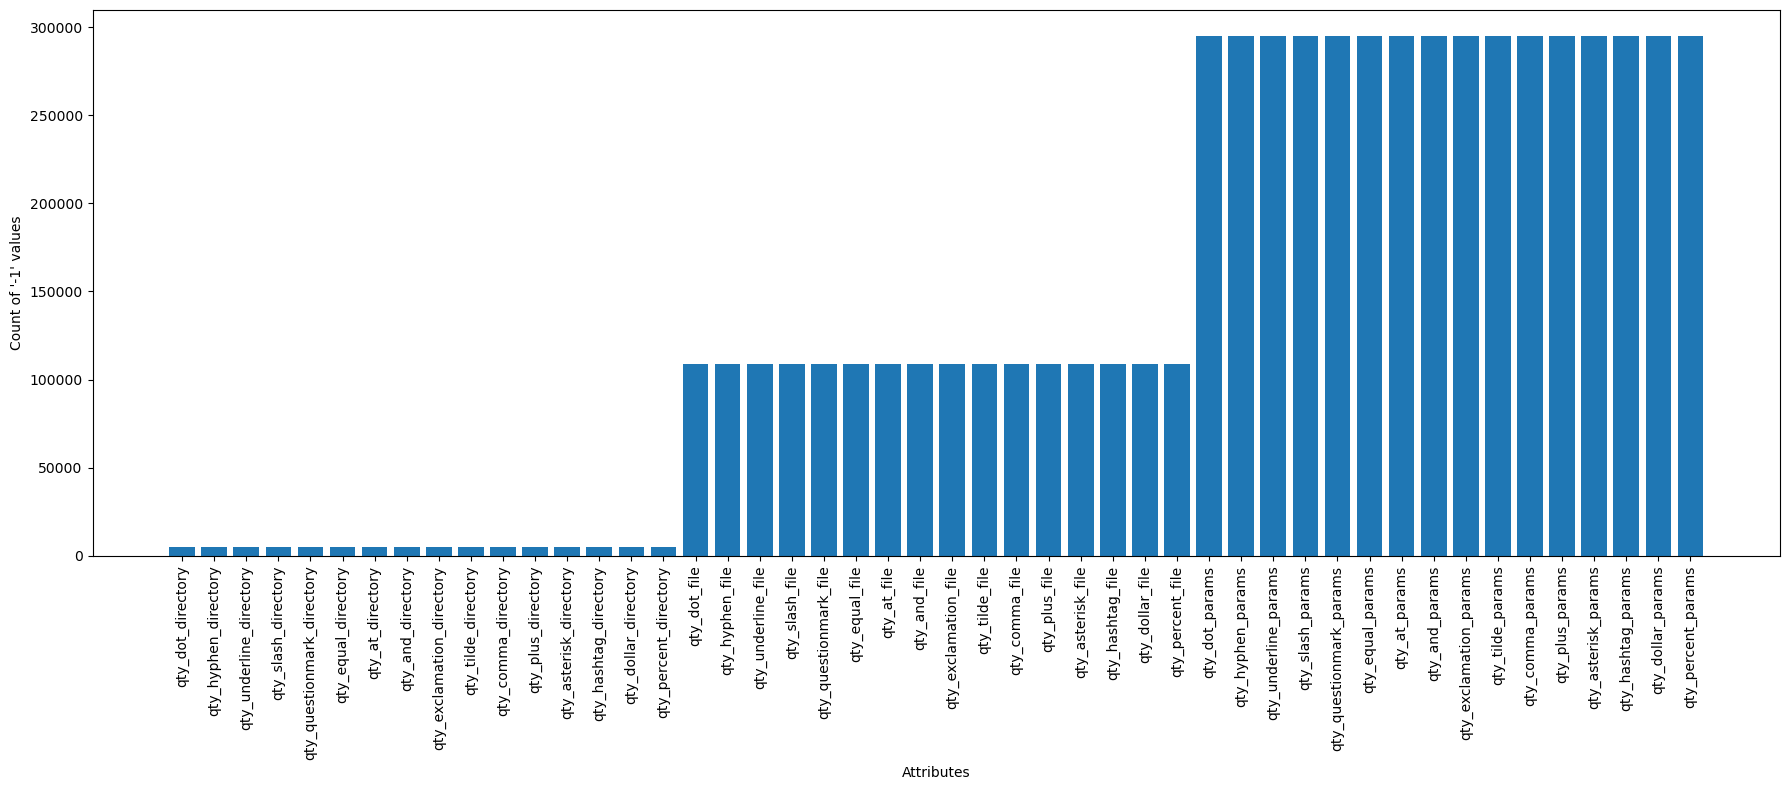

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/all_feats.csv') 

# count -1 values across all columns
minus_one_counts = (df == -1).sum()

# show only the ones missing any
minus_one_counts = minus_one_counts[minus_one_counts > 0]

plt.figure(figsize=(18, 8))
plt.bar(minus_one_counts.index, minus_one_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Attributes')
plt.ylabel("Count of '-1' values")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('dataset/all_feats.csv') 

total_urls = len(df)

missing_params = (df['qty_dot_params'] == -1).sum()
missing_file = (df['qty_dot_file'] == -1).sum()
missing_directory = (df['qty_dot_directory'] == -1).sum()

print(f"URLs missing parameter part: {missing_params:,} ({missing_params / total_urls:.2%})")
print(f"URLs missing file part: {missing_file:,} ({missing_file / total_urls:.2%})")
print(f"URLs missing directory part: {missing_directory:,} ({missing_directory / total_urls:.2%})")

URLs missing parameter part: 294,976 (84.25%)
URLs missing file part: 108,769 (31.07%)
URLs missing directory part: 4,936 (1.41%)


***

# 4. Feature selection

In [ ]:
num_features = len(df.columns)

print(f"Number of features: {num_features}")

Number of features: 98


In [ ]:
import pandas as pd

df = pd.read_csv('dataset/all_feats.csv')

# save labels to another file
df['Label'].to_csv('dataset/train_label_column.csv', index=False)

# and drop URLs
df_without_url = df.drop(['URL'], axis=1)

df_without_url.to_csv('dataset/all_without_url.csv', index=False)

In [ ]:
df = pd.read_csv('dataset/all_without_url.csv')

In [ ]:
print(df['Label'].dtype)

object


In [ ]:
# check unique values in labels
print(df['Label'].value_counts())

Label
bad     175115
good    175006
Name: count, dtype: int64


In [ ]:
label_mapping = {'good': 0, 'bad': 1}

# mapping
df['Label'] = df['Label'].map(label_mapping)

print(df['Label'].value_counts())

Label
1    175115
0    175006
Name: count, dtype: int64


In [ ]:
corr_matrix = df.corr() 
label_corr = corr_matrix['Label'].sort_values(ascending=False) 
print(label_corr)

Label                   1.000000
qty_dot_url             0.229559
qty_hyphen_domain       0.183791
qty_dot_domain          0.180886
domain_length           0.170448
                          ...   
qty_underline_file     -0.155223
file_length            -0.194678
qty_hyphen_file        -0.198057
qty_hyphen_directory   -0.240218
qty_slash_domain             NaN
Name: Label, Length: 97, dtype: float64


I will drop qty_slash_domain as it holds the same value for all rows

In [ ]:
df = df.drop(columns=['qty_slash_domain'])

In [ ]:
df.to_csv('dataset/training_dataset0.csv', index=False)

## Features selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('dataset/training_dataset0.csv')

X = df.drop(columns=["Label"])
y = df['Label']

# applying SelectKBest with mutual information
selector = SelectKBest(mutual_info_classif, k=35) 
X_selected = selector.fit_transform(X, y)

# mutual information scores
mi_scores = selector.scores_

selected_columns = X.columns[selector.get_support()]

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
})

mi_df_sorted = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df_sorted.head(35)) 

                    Feature  Mutual Information
94          shannon_entropy            0.092475
54         directory_length            0.065131
37                  has_dir            0.063902
71              file_length            0.062578
17               length_url            0.058029
73           qty_dot_params            0.057846
0               qty_dot_url            0.048923
39     qty_hyphen_directory            0.046459
75     qty_underline_params            0.046396
76         qty_slash_params            0.044458
3             qty_slash_url            0.043691
34            domain_length            0.043169
79            qty_at_params            0.043035
74        qty_hyphen_params            0.042038
86       qty_hashtag_params            0.041592
83         qty_comma_params            0.040655
81   qty_exclamation_params            0.040363
33        qty_vowels_domain            0.040063
56          qty_hyphen_file            0.039900
85      qty_asterisk_params            0

I will modify the dataset so to keep only these features.

In [ ]:
df = pd.read_csv("dataset/training_dataset0.csv")

features = ["shannon_entropy", "directory_length", "has_dir", "file_length", "length_url", "qty_dot_params", "qty_dot_url", "qty_hyphen_directory",
            "qty_underline_params", "qty_slash_params", "qty_slash_url", "domain_length", "qty_at_params", "qty_hyphen_params", "qty_hashtag_params",
            "qty_comma_params", "qty_exclamation_params", "qty_vowels_domain", "qty_hyphen_file", "qty_asterisk_params", "qty_dollar_params",
            "has_file", "qty_questionmark_params", "qty_tilde_params", "qty_dot_domain", "params_length", "qty_slash_directory", "qty_and_params",
            "qty_equal_params", "qty_plus_params", "qty_dot_directory", "qty_underline_file", "qty_percent_params", "qty_hyphen_domain",
            "qty_hyphen_url"]

df = df[features]
df.to_csv('dataset/training_datasetDEF.csv', index=False)

***

Now I will create extract the same features for the testing set.

In [ ]:
import re
import pandas as pd

test_df = pd.read_csv('dataset/test_dataset.csv')

def extract_url_features(url):
    features = {}

    features['qty_dot_url'] = url.count('.')
    features['qty_hyphen_url'] = url.count('-')
    features['qty_slash_url'] = url.count('/')
    features['length_url'] = len(url)
    
    return features

url_features = []

for index, row in test_df.iterrows():
    url = row['URL']
    features = extract_url_features(url)
    url_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(url_features)
test_df_with_features = pd.concat([test_df, features_df], axis=1)

test_df_with_features.to_csv('dataset/test_url_feats.csv', index=False)
print("Feature extraction complete. See: 'test_url_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Feature extraction complete. See: 'test_url_feats.csv'


In [ ]:
import socket
import re
import pandas as pd

df = pd.read_csv('dataset/test_url_feats.csv')

def extract_domain(url):
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url

    domain = re.findall(r'://(.*?)(/|$)', url)
    if domain:
        return domain[0][0]
    else:
        if url.startswith('www.'):
            return url.split('/')[0].replace('www.', '')
        return url.split('/')[0]

def extract_domain_features(domain):
    features = {}
    
    features['qty_dot_domain'] = domain.count('.')
    features['qty_hyphen_domain'] = domain.count('-')
    features['qty_vowels_domain'] = sum([1 for char in domain if char.lower() in 'aeiou'])
    features['domain_length'] = len(domain)

    return features

domain_features = []

for index, row in df.iterrows():
    url = row['URL']
    domain = extract_domain(url)
    features = extract_domain_features(domain)
    domain_features.append(features)

    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(domain_features)
df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/test_domain_feats.csv', index=False)
print("Domain feature extraction complete:'test_domain_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Domain feature extraction complete:'test_domain_feats.csv'


In [ ]:
import pandas as pd
import re

df = pd.read_csv('dataset/test_domain_feats.csv')

def extract_directory(url):
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url
    match = re.search(r'://[^/]+(/.*?)(\?|$)', url)
    if match:
        return match.group(1)
    else:
        return None

def extract_directory_features(directory):
    features = {}
    
    if directory is None:
        features['has_dir'] = 0  
        features['qty_hyphen_directory'] = -1
        features['qty_slash_directory'] = -1
        features['qty_dot_directory'] = -1
        features['directory_length'] = 0
    else:
        features['has_dir'] = 1  
        features['qty_hyphen_directory'] = directory.count('-')
        features['qty_slash_directory'] = directory.count('/')
        features['qty_dot_directory'] = directory.count('.')
        features['directory_length'] = len(directory)
    
    return features

directory_features = []

for index, row in df.iterrows():
    url = row['URL']
    directory = extract_directory(url)
    features = extract_directory_features(directory)
    directory_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(directory_features)
df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/test_directory_feats.csv', index=False)
print("Directory feature extraction complete: 'test_directory_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Directory feature extraction complete: 'test_directory_feats.csv'


In [ ]:
import pandas as pd
import re

df = pd.read_csv('dataset/test_directory_feats.csv')

def extract_file(url):

    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url  

    match = re.search(r'\/([^\/\?]*)(\?|$)', url)
    if match:
        return match.group(1) if match.group(1) else None
    return None

def extract_file_features(file):
    features = {}
    
    if file is None or file == '':
        features['has_file'] = 0
        features['qty_hyphen_file'] = -1
        features['file_length'] = 0
        features['qty_underline_file'] = -1        
        
    else:
        features['has_file'] = 1
        features['qty_hyphen_file'] = file.count('-')
        features['file_length'] = len(file)        
        features['qty_underline_file'] = file.count('_')
     
    return features

file_features = []

for index, row in df.iterrows():
    url = row['URL']
    file = extract_file(url)
    features = extract_file_features(file)
    file_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(file_features)
df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/test_file_feats.csv', index=False)
print("File feature extraction complete: 'test_file_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
File feature extraction complete: 'test_file_feats.csv'


In [ ]:
import pandas as pd
import re

df = pd.read_csv('dataset/test_file_feats.csv')

def extract_params(url):

    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url

    match = re.search(r'\?(.*)', url)
    if match:
        return match.group(1) 
    return None

def extract_params_features(params):
    features = {}
    
    if params is None:
        features['qty_dot_params'] = -1
        features['qty_slash_params'] = -1
        features['qty_comma_params'] = -1
        features['qty_at_params'] = -1
        features['qty_hyphen_params'] = -1
        features['qty_dollar_params'] = -1
        features['qty_asterisk_params'] = -1
        features['qty_underline_params'] = -1
        features['qty_questionmark_params'] = -1
        features['qty_equal_params'] = -1
        features['qty_and_params'] = -1
        features['qty_exclamation_params'] = -1
        features['qty_tilde_params'] = -1
        features['qty_plus_params'] = -1
        features['qty_hashtag_params'] = -1
        features['qty_percent_params'] = -1
        features['params_length'] = 0
    else:
        features['qty_dot_params'] = params.count('.')
        features['qty_slash_params'] = params.count('/')
        features['qty_comma_params'] = params.count(',')
        features['qty_at_params'] = params.count('@')
        features['qty_hyphen_params'] = params.count('-')
        features['qty_dollar_params'] = params.count('$')
        features['qty_asterisk_params'] = params.count('*')
        features['qty_underline_params'] = params.count('_')
        features['qty_questionmark_params'] = params.count('?')
        features['qty_equal_params'] = params.count('=')
        features['qty_and_params'] = params.count('&')
        features['qty_exclamation_params'] = params.count('!')
        features['qty_tilde_params'] = params.count('~')
        features['qty_plus_params'] = params.count('+')
        features['qty_hashtag_params'] = params.count('#')
        features['qty_percent_params'] = params.count('%')
        features['params_length'] = len(params)
    
    return features

params_features = []

for index, row in df.iterrows():
    url = row['URL']
    params = extract_params(url)
    features = extract_params_features(params)
    params_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(params_features)
df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/test_params_feats.csv', index=False)
print("Parameter feature extraction complete: 'test_params_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Parameter feature extraction complete: 'test_params_feats.csv'


In [ ]:
import numpy as np

def shannon_entropy(url):
    if not url:
        return 0
    prob = [url.count(c) / len(url) for c in set(url)]
    return -sum(p * np.log2(p) for p in prob)
    
df_with_features["shannon_entropy"] = df_with_features["URL"].apply(shannon_entropy)

In [ ]:
df_with_features.to_csv('dataset/test_with_shannon.csv', index=False)

In [ ]:
df = pd.read_csv("dataset/test_with_shannon.csv")

# drop URLs
df = df.drop(columns=["URL"])

# map labels to binary
df["Label"] = df["Label"].map({"good": 0, "bad": 1})

In [ ]:
df.to_csv('dataset/testing_revamped.csv', index=False)

In [ ]:
# save testing labels separately
labels = df[["Label"]]
labels.to_csv("dataset/testing_labels.csv", index=False)

In [ ]:
df = df.drop(columns=["Label"])

In [ ]:
df.to_csv('dataset/testing_revamped1.csv', index=False)

Reordering the columns to have the same order as in training

In [ ]:
import pandas as pd

training_df = pd.read_csv("dataset/training_datasetDEF.csv")
testing_df = pd.read_csv("dataset/testing_revamped1.csv")

testing_df = testing_df[training_df.columns]

testing_df.to_csv("dataset/testing_revamped2.csv", index=False)

Since both training and testing dataset are ready to be used, we proceed with different models evaluations.

In [ ]:
X_test = df_test.drop(columns=['Label'])  # features
y_test = df_test['Label']  # labels